In [1]:
import utils

base = utils.load_results("results/Base_approach.pkl")
split = utils.load_results("results/data_split.pkl")
epoch = utils.load_results("results/epoch_split.pkl")


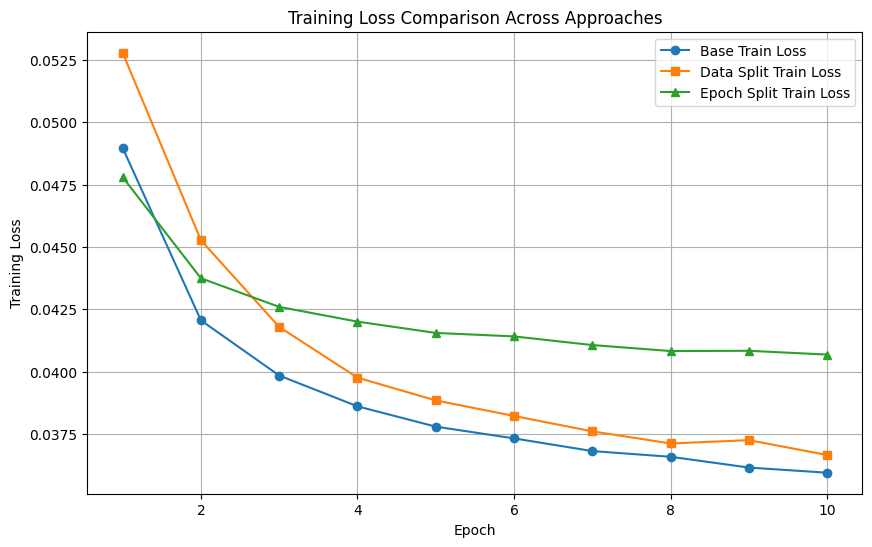

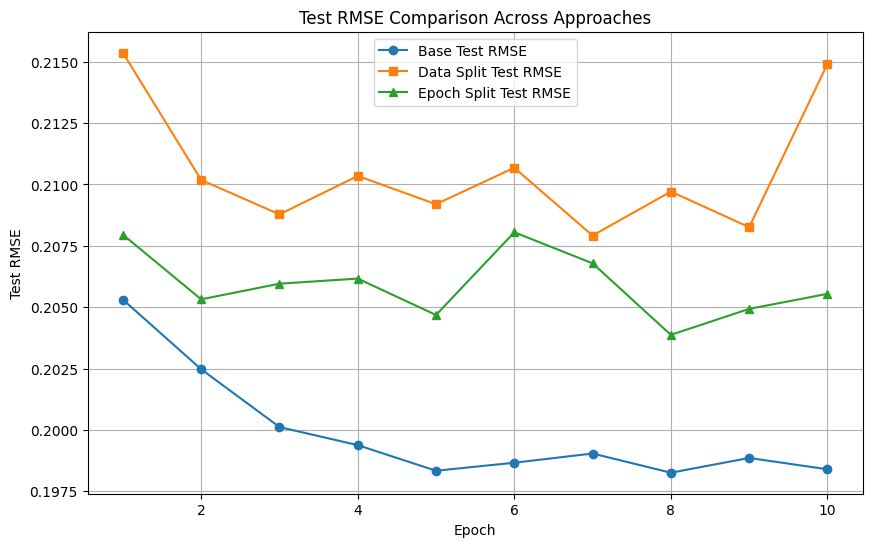

In [4]:
import matplotlib.pyplot as plt

# Extract curves
# Base
base_train = base["train_losses"]
base_test = base["test_rmses"]

# Data split
split_train = split["min_train_curve"]
split_test = split["min_test_rmse_curve"]

# Epoch split
epoch_train = epoch["min_train_curve"]
epoch_test = epoch["min_test_rmse_curve"]

n_epochs = len(base_train)  # assuming all have same length

# ---------- Plot Train Loss ----------
plt.figure(figsize=(10,6))
plt.plot(range(1, n_epochs+1), base_train, marker='o', label="Base Train Loss")
plt.plot(range(1, n_epochs+1), split_train, marker='s', label="Data Split Train Loss")
plt.plot(range(1, n_epochs+1), epoch_train, marker='^', label="Epoch Split Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison Across Approaches")
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot Test RMSE ----------
plt.figure(figsize=(10,6))
plt.plot(range(1, n_epochs+1), base_test, marker='o', label="Base Test RMSE")
plt.plot(range(1, n_epochs+1), split_test, marker='s', label="Data Split Test RMSE")
plt.plot(range(1, n_epochs+1), epoch_test, marker='^', label="Epoch Split Test RMSE")
plt.xlabel("Epoch")
plt.ylabel("Test RMSE")
plt.title("Test RMSE Comparison Across Approaches")
plt.legend()
plt.grid(True)
plt.show()
